In [27]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler, Normalizer

In [28]:
rfm_df = pd.read_csv("../data/transformed/clean_rfm_data.csv")

rfm_df.head()

,Recency_of_Purchase,Frequency_of_Purchases,Amount_Spent
0,334,4,5764.0915
1,25,182,4310.0000
2,98,27,1437.2400
3,41,72,1457.5500
4,333,16,294.4000


In [29]:
#### Standardizing the data

In [30]:
scaler = StandardScaler()

X_std = pd.DataFrame(data=scaler.fit_transform(rfm_df), columns=rfm_df.columns)

X_std.head()

,Recency_of_Purchase,Frequency_of_Purchases,Amount_Spent
0,2.310531,-0.849261,2.971926
1,-0.925052,1.313201,2.005292
2,-0.160659,-0.569842,0.095573
3,-0.757514,-0.023152,0.109074
4,2.300060,-0.703477,-0.664151


Verification-Mean-0 and std-1

In [31]:
X_std.describe()

,Recency_of_Purchase,Frequency_of_Purchases,Amount_Spent
count,4.338000e+03,4.338000e+03,4.338000e+03
mean,1.310360e-17,1.474155e-17,1.179324e-16
std,1.000115e+00,1.000115e+00,1.000115e+00
min,-9.250525e-01,-8.492607e-01,-7.859876e-01
25%,-7.679853e-01,-6.913282e-01,-6.574417e-01
50%,-4.224375e-01,-3.997603e-01,-4.186320e-01
75%,5.409078e-01,2.927132e-01,2.300172e-01
max,2.310531e+00,2.843932e+00,2.971926e+00


Normalizing teh data (default normalization L2)

In [32]:
normalizer = Normalizer()

X_df = pd.DataFrame(data=normalizer.fit_transform(X_std), columns=rfm_df.columns) 

X_df.head()

,Recency_of_Purchase,Frequency_of_Purchases,Amount_Spent
0,0.598733,-0.220071,0.770122
1,-0.360038,0.511108,0.780475
2,-0.267890,-0.950178,0.159362
3,-0.989339,-0.030237,0.142455
4,0.921777,-0.281927,-0.266167


Can be observed that the min is -1 and max is +1

In [33]:
X_df.describe()

,Recency_of_Purchase,Frequency_of_Purchases,Amount_Spent
count,4338.000000,4338.000000,4338.000000
mean,-0.113376,-0.146380,-0.152253
std,0.633697,0.528933,0.511286
min,-0.999593,-0.999319,-0.991230
25%,-0.630832,-0.573286,-0.558436
50%,-0.283903,-0.325713,-0.324139
75%,0.554508,0.291629,0.227677
max,0.999939,0.998802,0.999952


In [34]:
X_df['Recency_of_Purchase']**2 + X_df['Frequency_of_Purchases']**2 + X_df['Amount_Spent']**2

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4333    1.0
4334    1.0
4335    1.0
4336    1.0
4337    1.0
Length: 4338, dtype: float64

observing the data after standardizing and normalizing, we can see some sort of pattern but it is not clear

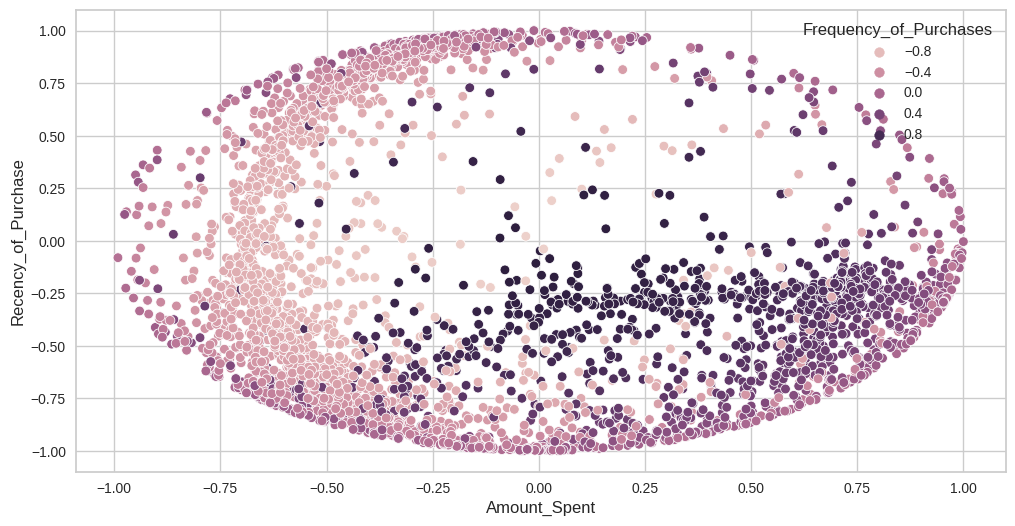

In [35]:
plt.figure(figsize=[12, 6])

sns.scatterplot(x="Amount_Spent", y="Recency_of_Purchase", 
                data=X_df, 
                hue="Frequency_of_Purchases")

plt.show()

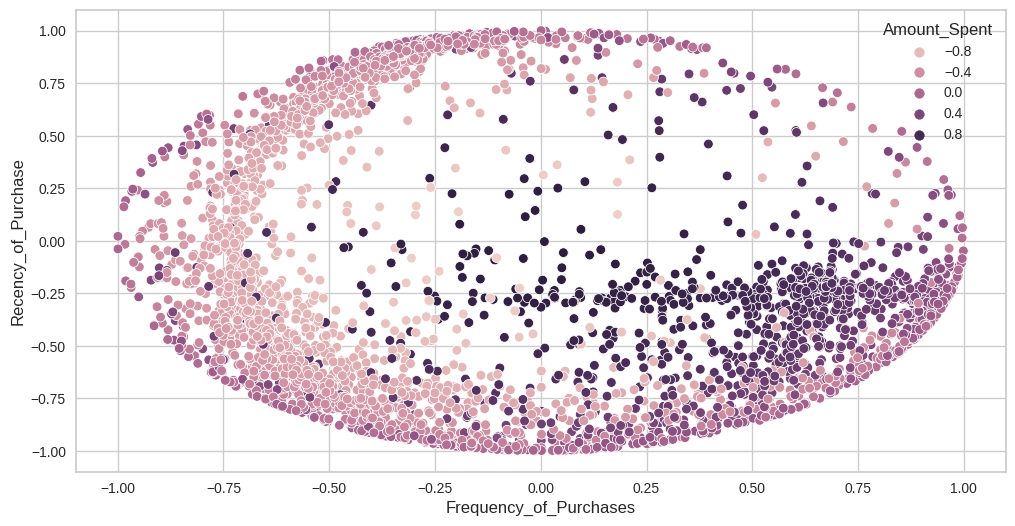

In [36]:
plt.figure(figsize=[12, 6])

sns.scatterplot(x="Frequency_of_Purchases", y="Recency_of_Purchase", 
                data=X_df, 
                hue="Amount_Spent")

plt.show()

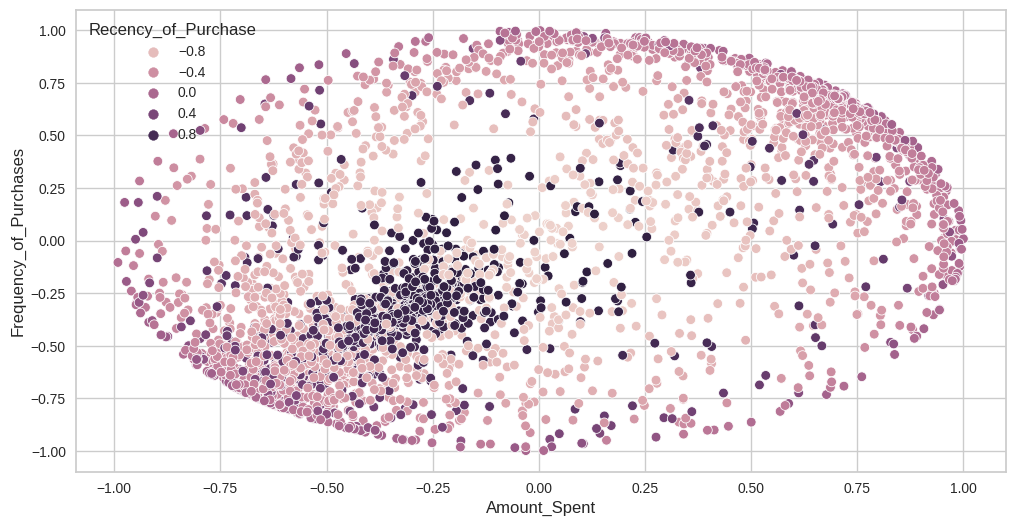

In [37]:
plt.figure(figsize=[12, 6])

sns.scatterplot(x="Amount_Spent", y="Frequency_of_Purchases", 
                data=X_df, 
                hue="Recency_of_Purchase")

plt.show()

Calculating the squared distances beween centroid and each member of the cluster

In [38]:
import warnings
warnings.filterwarnings("ignore")

sum_of_sq_dist = []

for i in range(1, 21):
    model = KMeans(n_clusters=i)
    
    model.fit(X_df)
    
    sum_of_sq_dist.append(model.inertia_)

    print("Sum of square distances for {} clusters: {}".format(i, sum_of_sq_dist[i-1]))

Sum of square distances for 1 clusters: 4088.728949209494
Sum of square distances for 2 clusters: 2270.1511180464704
Sum of square distances for 3 clusters: 1038.6881351753452
Sum of square distances for 4 clusters: 829.9602350542949
Sum of square distances for 5 clusters: 689.7264836360304
Sum of square distances for 6 clusters: 589.6513634253389
Sum of square distances for 7 clusters: 514.8068972201866
Sum of square distances for 8 clusters: 456.53362807636137
Sum of square distances for 9 clusters: 404.8113336780374
Sum of square distances for 10 clusters: 361.7283289673069
Sum of square distances for 11 clusters: 324.09565672437185
Sum of square distances for 12 clusters: 297.37258311791567
Sum of square distances for 13 clusters: 279.15289735125344
Sum of square distances for 14 clusters: 262.7137416861341
Sum of square distances for 15 clusters: 245.59330922732903
Sum of square distances for 16 clusters: 233.36652761121397
Sum of square distances for 17 clusters: 218.030421706318

Elbow method to find the optimal clusters. We can observe it is 3. Note that xticks are dined for showing integer values at ticks.

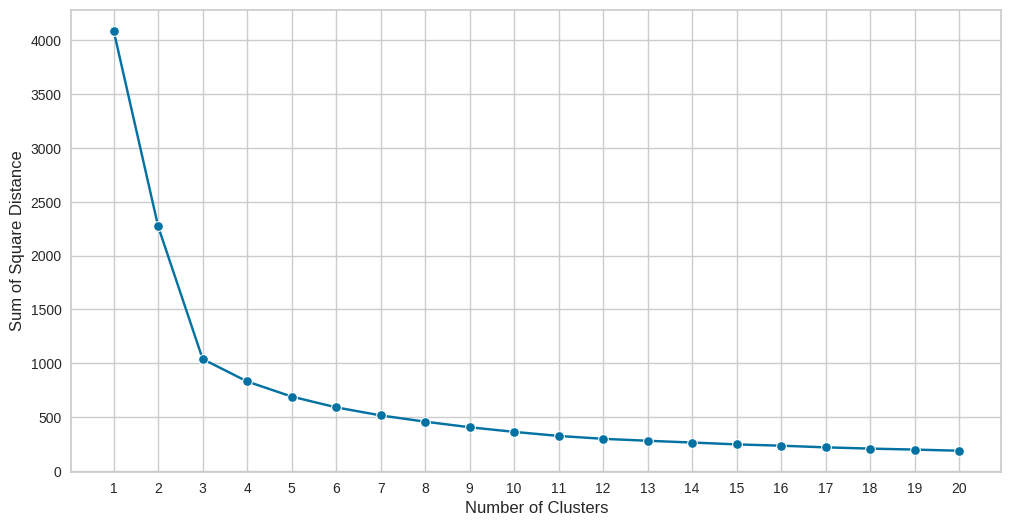

In [39]:
plt.figure(figsize=[12, 6])

sns.lineplot(x=range(1, 21), y=sum_of_sq_dist, marker="o")

plt.xticks(range(1, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Square Distance")

plt.show()

Calculating silhoutte_scores for each cluster

In [40]:
silhouette_scores = []

for i in range(2, 21):
    model = KMeans(n_clusters=i)
    
    model.fit(X_df)
    
    silhouette_scores.append(silhouette_score(X_df, model.labels_))

    print("Silhouette Score for {} clusters: {}".format(i, silhouette_scores[i-2]))

Silhouette Score for 2 clusters: 0.4444726239390962
Silhouette Score for 3 clusters: 0.5619917684288034
Silhouette Score for 4 clusters: 0.5049181820323116
Silhouette Score for 5 clusters: 0.4646301724628553
Silhouette Score for 6 clusters: 0.454296176570026
Silhouette Score for 7 clusters: 0.4542820604033713
Silhouette Score for 8 clusters: 0.40864798667216257
Silhouette Score for 9 clusters: 0.4165772626469739
Silhouette Score for 10 clusters: 0.42300672004651546
Silhouette Score for 11 clusters: 0.43694439570679344
Silhouette Score for 12 clusters: 0.4386377175251978
Silhouette Score for 13 clusters: 0.41476952381822696
Silhouette Score for 14 clusters: 0.418808636022706
Silhouette Score for 15 clusters: 0.422105009941484
Silhouette Score for 16 clusters: 0.42483595941591984
Silhouette Score for 17 clusters: 0.4144201462870142
Silhouette Score for 18 clusters: 0.39326118091461876
Silhouette Score for 19 clusters: 0.4149368132144727
Silhouette Score for 20 clusters: 0.419906247771462

 we can observe Silhouette score for 3 is the highest. Note that xticks are defined for showing integer values at ticks.

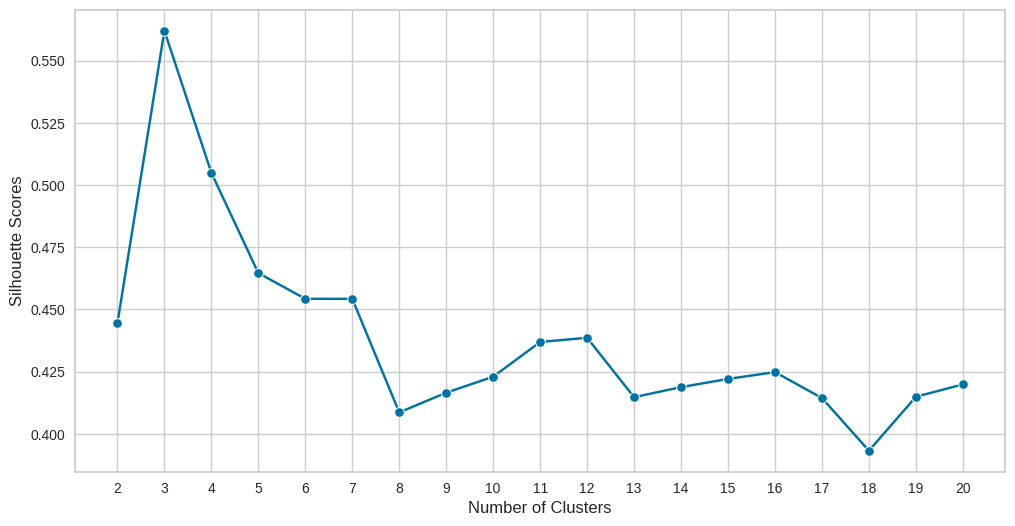

In [41]:
plt.figure(figsize=[12, 6])

sns.lineplot(x=range(2, 21), y=silhouette_scores, marker="o")

plt.xticks(range(2, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Scores")

plt.show()

The Silhouette Visualizer displays the silhouette coefficient for each sample on a per-cluster basis, visualizing which clusters are dense and which are not. This is particularly useful for determining cluster imbalance

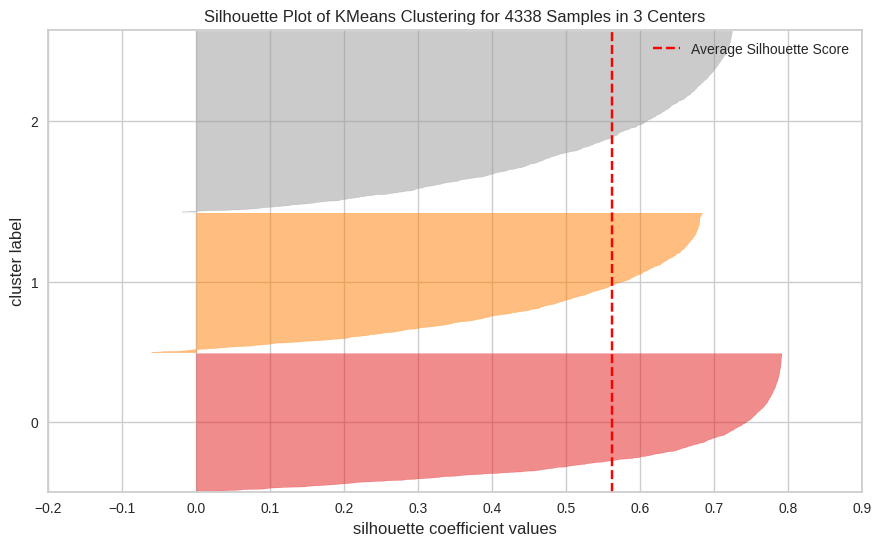

In [42]:
model = KMeans(n_clusters=3)
visualizer = SilhouetteVisualizer(model, size=(1050, 600))

visualizer.fit(X_df)
visualizer.show()

plt.show()

Model is defined and fitted with data. Optimal Number of cluster 3 is the input as n_clusters

In [43]:
model = KMeans(n_clusters=3)

model.fit(X_df)

KMeans(n_clusters=3)

Creating a new column with cluster lables

In [44]:
X_df["Clusters"] = model.labels_

X_df.head()

,Recency_of_Purchase,Frequency_of_Purchases,Amount_Spent,Clusters
0,0.598733,-0.220071,0.770122,2
1,-0.360038,0.511108,0.780475,0
2,-0.267890,-0.950178,0.159362,1
3,-0.989339,-0.030237,0.142455,0
4,0.921777,-0.281927,-0.266167,2


In [45]:
X_df.to_csv("../data/transformed/kmeans_data.csv", index=False)

Checking distribution of data points in Cluster

In [46]:
X_df["Clusters"].value_counts()

1    1713
0    1322
2    1303
Name: Clusters, dtype: int64

these are the clusters centers

In [47]:
centers = model.cluster_centers_

centers

array([[-0.400046  ,  0.51594075,  0.48008352],
       [-0.55452768, -0.48819569, -0.48636114],
       [ 0.75720056, -0.37052726, -0.35605689]])

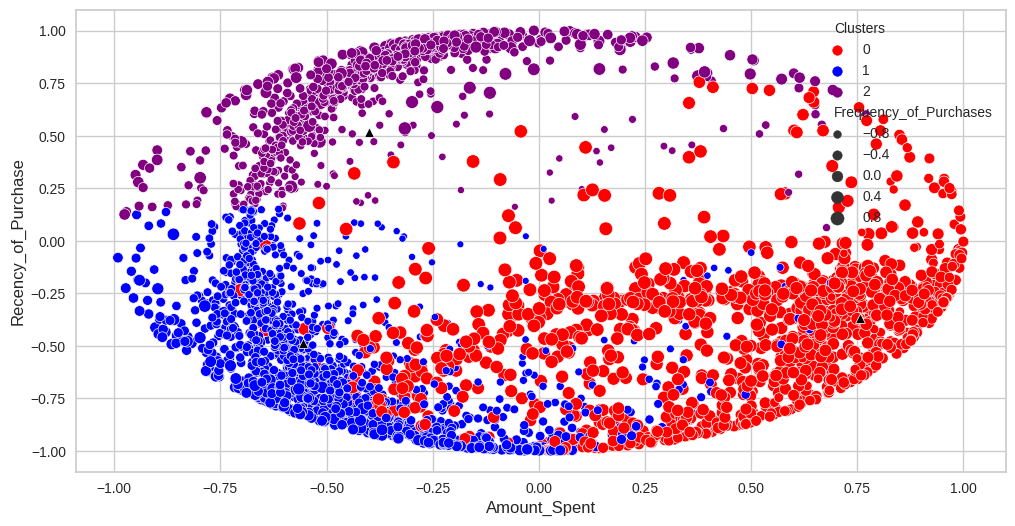

In [48]:
plt.figure(figsize=[12, 6])

colors = ["red", "blue", "purple"]

sns.scatterplot(x="Amount_Spent", y="Recency_of_Purchase", data=X_df, 
                size="Frequency_of_Purchases", 
                hue="Clusters", palette=colors)

sns.scatterplot(x=centers[:, 0], y=centers[:, 1], marker="^", color="black")

plt.show()

3D Representation

In [49]:
plt.figure(figsize=[12, 8])

fig = px.scatter_3d(X_df, x="Recency_of_Purchase", 
                    y="Frequency_of_Purchases", z="Amount_Spent",
                    color="Clusters")

fig.show()

<Figure size 1200x800 with 0 Axes>

#### Cluster Profiling

* One of the clusters will have customers who have the most recent purchases (recency box plot will be high up)
* Another cluster will have high frequency of purchases and high amount spent( but purchases not recent)
* The last cluster is a fropy of people that have lowest avg values of revery variable (RFM)

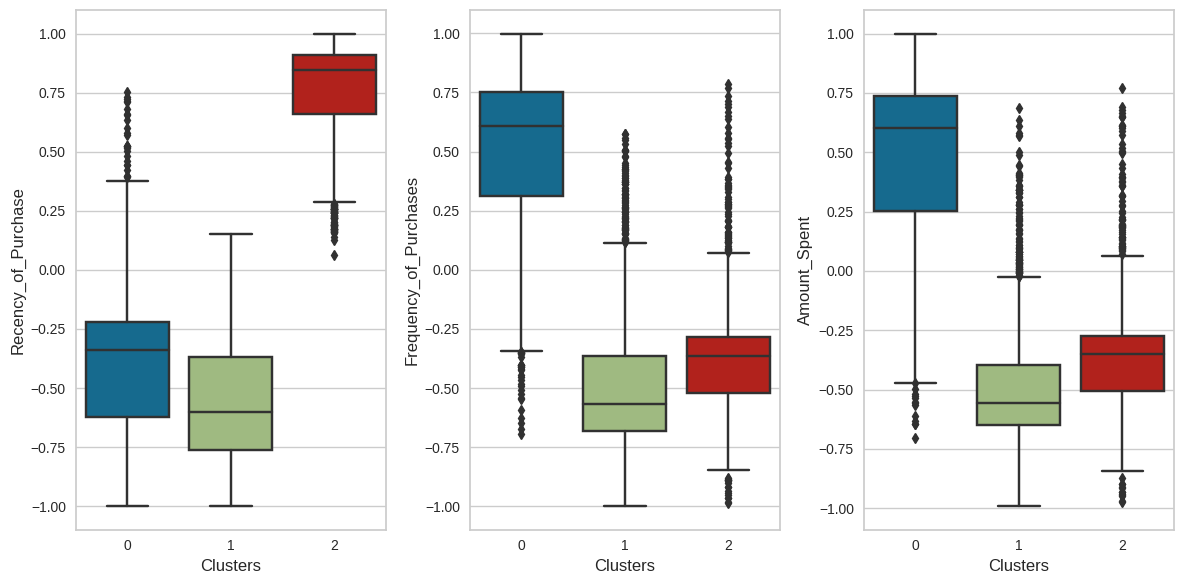

In [50]:
fig, axes = plt.subplots(1, 3, figsize=[12, 6])

sns.boxplot(x="Clusters", y="Recency_of_Purchase", data=X_df, ax=axes[0])
sns.boxplot(x="Clusters", y="Frequency_of_Purchases", data=X_df, ax=axes[1])
sns.boxplot(x="Clusters", y="Amount_Spent", data=X_df, ax=axes[2])

plt.tight_layout()
plt.show()

we will be dropping the Cluster column and save the standardized and normalized data to a new csv

In [51]:
X_df.drop(["Clusters"], axis=1, inplace=True)

X_df.head()

,Recency_of_Purchase,Frequency_of_Purchases,Amount_Spent
0,0.598733,-0.220071,0.770122
1,-0.360038,0.511108,0.780475
2,-0.267890,-0.950178,0.159362
3,-0.989339,-0.030237,0.142455
4,0.921777,-0.281927,-0.266167


In [52]:
X_df.to_csv("../data/transformed/std_norm_rfm_data.csv", index=False)